# Task 1: Principle component analysis - Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

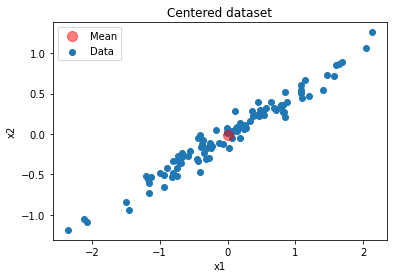

In [2]:
# load dataset
data = np.loadtxt(fname="pca_dataset.txt")
#print(data) #use this to check whether the data is properly loaded

#reshape dataset (not necessary here)
X = data

#center the data
X = X - X.mean()

# plot the data
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], label='Data')

# compute and plot the mean 
mean_d1, mean_d2 = X.mean(0)
ax.plot(mean_d1, mean_d2, 'o', label='Mean', markersize=10, color='red', alpha=0.5);
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Centered dataset');
ax.legend(loc='best');

### PCA based on eigendecomposition of the covariance

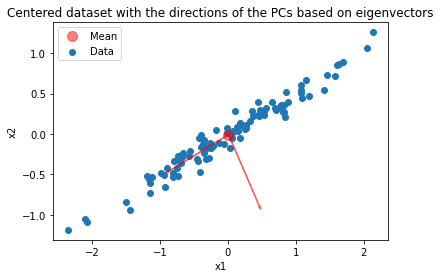

In [3]:
# PCA based on eigendecomposition
# compute covariance matrix
covariance = X.T.dot(X)/(X.shape[0]-1)

# compute eigenvalues and eigenvectors of the covariance
evalue, evec = np.linalg.eigh(covariance)

# plot the data (again)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], label='Data')

# compute and plot the mean  (again)
mean_d1, mean_d2 = X.mean(0)
ax.plot(mean_d1, mean_d2, 'o', label='Mean', markersize=10, color='red', alpha=0.5)

# plot the arrows for the eigenvectors
ax.arrow(mean_d1, mean_d2, evec[0, 0], evec[1, 0], width=0.01, color='red', alpha=0.5)
ax.arrow(mean_d1, mean_d2, evec[0, 1], evec[1, 1], width=0.01, color='red', alpha=0.5);
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Centered dataset with the directions of the PCs based on eigenvectors');
ax.legend(loc='best');

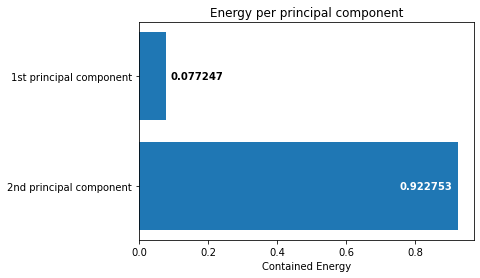

In [4]:
# calculate energies
e1_eig = np.sqrt(evalue[0]) / sum(np.sqrt(evalue))
e2_eig = np.sqrt(evalue[1]) / sum(np.sqrt(evalue))

# plot energies
fig, ax = plt.subplots()
e_eig = ('1st principal component', '2nd principal component')
y_pos = np.arange(len(e_eig))

bars = ax.barh(y_pos, [e1_eig, e2_eig], align='center')
# plot energy explicitly
for bar in bars:
    if bar.get_width() < 0.2:
        xloc = 5 # Shift the text to the right side of the right edge
        clr = 'black'
        align = 'left'
    else:
        xloc = -5 # Shift the text to the left side of the right edge
        clr = 'white'
        align = 'right'
    yloc = bar.get_y() + bar.get_height() / 2 # Center the text vertically in the bar
    label = ax.annotate('%.6f'%bar.get_width(), xy=(bar.get_width(), yloc), xytext=(xloc, 0),
                        textcoords="offset points",
                        ha=align, va='center',
                        color=clr, weight='bold', clip_on=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(e_eig)
ax.invert_yaxis()
ax.set_xlabel('Contained Energy')
ax.set_title('Energy per principal component')
plt.show()

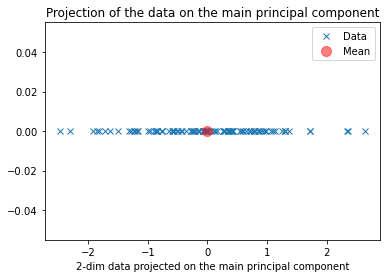

In [5]:
# project the data onto the eigenvector with the largest eigenvalue (which covers most of the variance)
X_projected = X.dot(evec[:, 1])

# plot the projected data
fig, ax = plt.subplots()
ax.plot(X_projected, np.zeros_like(X_projected), 'x', label='Data')

# compute and plot the mean of the projected data
mean = X_projected.mean(0)
ax.plot(mean, 0, 'o', label='Mean', markersize=10, color='red', alpha=0.5);
ax.set_xlabel('2-dim data projected on the main principal component')
ax.set_title('Projection of the data on the main principal component');
ax.legend(loc='best');

### PCA based on singular value decomposition

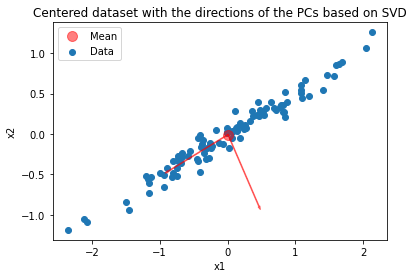

In [6]:
# PCA based on singular value decomposition
# singular value decomposition
U, sigma, VT = np.linalg.svd(X, 1)
Sigma = np.diag(sigma)

# plot the data (again)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], label='Data')

# compute and plot the mean (again)
mean_d1, mean_d2 = X.mean(0)
ax.plot(mean_d1, mean_d2, 'o', label='Mean', markersize=10, color='red', alpha=0.5)

# plot the arrows for the principal components
ax.arrow(mean_d1, mean_d2, VT[0, 0], VT[0, 1], width=0.01, color='red', alpha=0.5)
ax.arrow(mean_d1, mean_d2, VT[1, 0], VT[1, 1], width=0.01, color='red', alpha=0.5);
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Centered dataset with the directions of the PCs based on SVD');
ax.legend(loc='best');

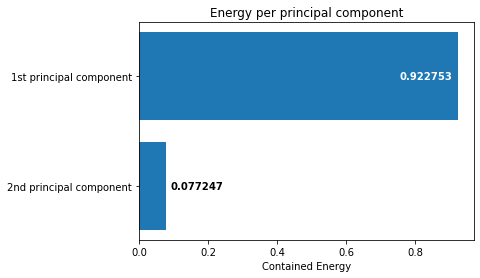

In [7]:
# calculate energies
e1_svd = sigma[0] / sum(sigma)
e2_svd = sigma[1] / sum(sigma)

# plot energies
fig, ax = plt.subplots()
e_svd = ('1st principal component', '2nd principal component')
y_pos = np.arange(len(e_svd))

bars = ax.barh(y_pos, [e1_svd, e2_svd], align='center')
# plot energy explicitly
for bar in bars:
    if bar.get_width() < 0.2:
        xloc = 5 # Shift the text to the right side of the right edge
        clr = 'black'
        align = 'left'
    else:
        xloc = -5 # Shift the text to the left side of the right edge
        clr = 'white'
        align = 'right'
    yloc = bar.get_y() + bar.get_height() / 2 # Center the text vertically in the bar
    label = ax.annotate('%.6f'%bar.get_width(), xy=(bar.get_width(), yloc), xytext=(xloc, 0),
                        textcoords="offset points",
                        ha=align, va='center',
                        color=clr, weight='bold', clip_on=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(e_svd)
ax.invert_yaxis()
ax.set_xlabel('Contained Energy')
ax.set_title('Energy per principal component')
plt.show()

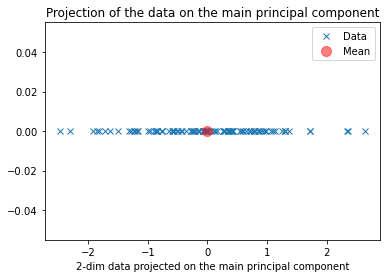

In [8]:
# project the data onto the dominating principal component (which covers most of the variance)
X_projected = X.dot(VT[0, :])

# plot the projected data
fig, ax = plt.subplots()
ax.plot(X_projected, np.zeros_like(X_projected), 'x', label='Data')

# compute and plot the mean of the projected data
mean = X_projected.mean(0)
ax.plot(mean, 0, 'o', label='Mean', markersize=10, color='red', alpha=0.5);
ax.set_xlabel('2-dim data projected on the main principal component')
ax.set_title('Projection of the data on the main principal component');
ax.legend(loc='best');

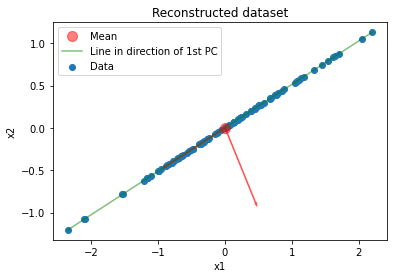

In [9]:
# reconstruct data according to the PCA - only possible for the approach via SVD
X_rec = U[:,:1] @ Sigma[:1,:1] @ VT[:1,:]

# plot the reconstructed data
fi, ax = plt.subplots()
ax.scatter(X_rec[:,0],X_rec[:,1], label='Data')

# compute and plot the mean of the projected data
mean_d1, mean_d2 = X_rec.mean(0)
ax.plot(mean_d1, mean_d2, 'o', label='Mean', markersize=10, color='red', alpha=0.5)

# plot the arrows for the principal components
ax.arrow(mean_d1, mean_d2, VT[0, 0], VT[0, 1], width=0.01, color='red', alpha=0.5)
ax.arrow(mean_d1, mean_d2, VT[1, 0], VT[1, 1], width=0.01, color='red', alpha=0.5);

# plot a line along the first principal component
x = np.linspace(min(X_rec[:,0]),max(X_rec[:,0]),100)
m = (mean_d2 - VT[0,1])/(mean_d1 - VT[0,0])
y = m*x
ax.plot(x,y, label='Line in direction of 1st PC', color='green', alpha=0.5);
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Reconstructed dataset')
ax.legend(loc='best');

In [10]:
# Mean squared error between original data and reconstructed data
print("MSE = %.6f " %(np.mean((X - X_rec)**2)))

MSE = 0.003464 
